<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/Batch10/011125_ML_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Classification

Classification is a type of machine learning where the **computer learns to put things into categories**. Imagine you have a big box of different toys, and you want to sort them into smaller boxes labeled "cars," "dolls," and "blocks." That's what classification does - **it sorts things into the right groups.**

Examples of classification problems:

* is email spam or not
* is recent user behaviour churn or not
* will it rain today or not

Ask: Give examples of classification problems in your daily life

|User A|	User B|	Age Difference|	Common Interests|	Geographic Distance	|Message Exchange Rate|	Outcome(Label)|
|-------|-------|--------|------|-----|-|-|
|A|B|	3|	4|	5 miles|	10 messages/day|	Match (1)|
|A|C|	7|	1|	20 miles|	2 messages/day|	No Match (0)|

In this exercise, we will predict if the person can live comfortably in the US using the salary dataset (from last week's exercises).

The U.S median income for single, full-time workers is around $60,000.

# Import libraries

In [ ]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})

# Load dataset

We start by loading and inspecting the dataset to get a high-level understanding of its structure and content.

In [ ]:
data = pd.read_excel('Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1_CLEANED.xlsx')

In [ ]:
data.head()

,Unnamed: 0,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,0,4/27/2021 11:02:10,30,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,1,4/27/2021 11:02:22,31,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,2,4/27/2021 11:02:38,34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,3,4/27/2021 11:02:41,26,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,4,4/27/2021 11:02:42,26,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,9,6,College degree,Woman,White


In [ ]:
print("Size of the dataset:", data.shape)

Size of the dataset: (28042, 19)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28042 entries, 0 to 28041
Data columns (total 19 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Unnamed: 0                                                                                                                                                                                                                            28042 non-null  int64  
 1   Timestamp                                                                                                    

### Rename columns

In [ ]:
data.rename(columns={'Timestamp':'time',
                     'How old are you?': 'age',
                     'What industry do you work in?':'industry',
                     'Job title': 'job',
                     'If your job title needs additional context, please clarify here:':'job_others',
                     "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'annual_salary' , 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.' : 'addtl_compensation',
                    'Please indicate the currency': "currency",
                    'If "Other," please indicate the currency here: ' : "currency_others",
                    'If your income needs additional context, please provide it here:' : "income_addlcontext",
                    'What country do you work in?': "work_country",
                    "If you're in the U.S., what state do you work in?" : "US_state",
                    'What city do you work in?' : "city",
                    'How many years of professional work experience do you have overall?' : "yrs_exp",
                    "How many years of professional work experience do you have in your field?" : "yrs_exp_field",
                    'What is your highest level of education completed?' : "educ_level",
                     "What is your gender?" : "gender",
                    'What is your race? (Choose all that apply.)' : "race"
                    },
            inplace=True)

Display the renamed columns

In [ ]:
data.columns

Index(['Unnamed: 0', 'time', 'age', 'industry', 'job', 'job_others',
       'annual_salary', 'addtl_compensation', 'currency', 'currency_others',
       'income_addlcontext', 'work_country', 'US_state', 'city', 'yrs_exp',
       'yrs_exp_field', 'educ_level', 'gender', 'race'],
      dtype='object')

# Data Preprocessing and Cleaning

Data preprocessing is crucial for preparing the dataset for modeling. Goal is to improve data quality by addressing data issues.

Examples of data issues:

* Missing Data
* Inconsistent Column Names
* Improper Data Types
* Duplicates
* Inconsistent Labels
* Single-Value columns (and low-variability columns)

Data preprocessing steps involve **but not limited to** the following:

1. Remove irrelevant column/s
2. Remove duplicate row/s
2. Handle missing values
3.   Deal with outliers
4.   Convert categorical variables into numerical format

Data cleaning ensures that the dataset is ready for analysis and modeling.

### Remove irrelevant column/s

Variables that do not obviously have value in the analysis should be removed.

In [ ]:
data.drop(columns = ['Unnamed: 0'], inplace=True)

### Remove duplicate row/s

Identify and remove any duplicate rows from the dataset. Duplicate rows can skew analysis results and lead to incorrect insights.

In [ ]:
data = data.drop_duplicates(subset=['age', 'industry', 'job', 'job_others',
       'annual_salary', 'addtl_compensation', 'currency', 'currency_others',
        'work_country', 'US_state', 'city', 'yrs_exp',
       'yrs_exp_field', 'educ_level', 'gender', 'race'])

### Check and convert to right data type

In order to prepare the dataset for analysis, the correct data types should be observed.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28040 entries, 0 to 28041
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                28040 non-null  object 
 1   age                 28040 non-null  int64  
 2   industry            27966 non-null  object 
 3   job                 28039 non-null  object 
 4   job_others          7258 non-null   object 
 5   annual_salary       28040 non-null  object 
 6   addtl_compensation  20753 non-null  float64
 7   currency            28040 non-null  object 
 8   currency_others     202 non-null    object 
 9   income_addlcontext  3039 non-null   object 
 10  work_country        28040 non-null  object 
 11  US_state            23026 non-null  object 
 12  city                27958 non-null  object 
 13  yrs_exp             28040 non-null  int64  
 14  yrs_exp_field       28040 non-null  int64  
 15  educ_level          27821 non-null  object 
 16  gender   

In [ ]:
data['time'] = pd.to_datetime(data['time']) # to datetime format

data['annual_salary'] = data['annual_salary'].str.replace(',', '')
data['annual_salary'] = data['annual_salary'].astype('float')
data['annual_salary'] # to float

,annual_salary
0,55000.0
1,54600.0
2,34000.0
3,62000.0
4,60000.0
...,...
28037,77600.0
28038,85000.0
28039,80000.0
28040,59000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28040 entries, 0 to 28041
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                28040 non-null  datetime64[ns]
 1   age                 28040 non-null  int64         
 2   industry            27966 non-null  object        
 3   job                 28039 non-null  object        
 4   job_others          7258 non-null   object        
 5   annual_salary       28040 non-null  float64       
 6   addtl_compensation  20753 non-null  float64       
 7   currency            28040 non-null  object        
 8   currency_others     202 non-null    object        
 9   income_addlcontext  3039 non-null   object        
 10  work_country        28040 non-null  object        
 11  US_state            23026 non-null  object        
 12  city                27958 non-null  object        
 13  yrs_exp             28040 non-null  int64         


## Handle missing values

Having missing values in the data is inevitable. In the real world, it's going to happen about 99% of the time, unless we have a perfect dataset. Good news! We have ways to deal with this.

1. Dropping of columns
2. Imputation of values

In [ ]:
# To check the number of missing values
data.isnull().sum().sort_values(ascending=False)

,0
currency_others,27838
income_addlcontext,25001
job_others,20782
addtl_compensation,7287
US_state,5014
educ_level,219
race,175
gender,170
city,82
industry,74


### Drop columns

Ask this:

1. Does the column have analytical value or have the possibility to influence the target variable?
2. Drop or impute?

<font color='blue'>Exercise 1</font>

1. Drop `time`, `currency_others`, `income_addlcontext`, `job_others` column

In [ ]:
data[~data['currency_others'].isna()]

,time,age,industry,job,job_others,annual_salary,addtl_compensation,currency,currency_others,income_addlcontext,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
434,2021-04-27 11:09:54,27,Computing or Tech,Data analyst,NaN,885000.0,0.0,Other,INR,NaN,India,NaN,Pune,4,3,Master's degree,Woman,Asian or Asian American
603,2021-04-27 11:12:24,47,Health care,Exec admin,Located in Argentina,1080000.0,223000.0,Other,Peso Argentino,Exchange about 1USD=165ARS,Argentina,NaN,City of Buenos Aires,16,17,College degree,Woman,"Hispanic, Latino, or Spanish origin"
752,2021-04-27 11:14:29,54,Public Library (technically City Govt.?),Administrative Librarian,I run a branch library and am responsible for ...,76302.0,0.0,USD,"$76,302.34",NaN,USA,Arizona,Glendale,24,29,Master's degree,Woman,White
766,2021-04-27 11:14:39,28,Recruitment or HR,Lead Payroll & Benefits Specialist,NaN,64000.0,6400.0,USD,My bonus is based on performance up to 10% of ...,NaN,US,New York,Schenectady,7,5,College degree,Woman,White
776,2021-04-27 11:14:45,51,Education (Higher Education),Sr Technical Support Rep,I,53000.0,0.0,USD,"I work for an online state university, managin...","I have excellent health benefits, time off, si...",USA,New Jersey,Trenton,9,3,Master's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28007,2024-02-06 21:15:28,21,Computing or Tech,sdsd,ds,4.0,22.0,USD,1,dd,ss,Arkansas,s,5,17,Some college,Man,Black or African American
28009,2024-02-10 15:04:31,30,"Accounting, Banking & Finance",mn jj,jmnjkkfd,15.0,NaN,USD,ekignkfb,dikfmklfb,dbfemf,"Alabama, Alaska, Arizona",dhgbfv,4,32,Some college,Woman,"Asian or Asian American, Black or African Amer..."
28015,2024-02-22 07:27:47,20,Computing or Tech,Intern,nhi,0.0,0.0,GBP,hhv,hvhv,ibdia,NaN,pubw,1,0,NaN,Woman,Black or African American
28021,2024-03-20 13:20:31,22,NaN,bum,supreme,10000000.0,299.0,USD,rice,ewad,usa,Alaska,Rice,42,10,"Professional degree (MD, JD, etc.)",Non-binary,White


In [ ]:
data.drop(columns=['time', 'currency_others', 'income_addlcontext', 'job_others'], inplace=True)

### Impute categorical columns

<font color='blue'>Exercise 2</font>

Ask: How to impute? What makes more sense?

1. Drop the row with missing variable - if less than 1% of the whole dataset, it's safe to drop. It won't affect the prediction drastically, anyway.
2. Impute by the mode - watchout for skewness

How should we replace the null values for the following variables: `educ_level`, `race`, `gender`,
       `city`, `industry`, `job`?

In [ ]:
## drop rows with missing variable (<1% of whole dataset)

data1 = data.copy()

data1 = data1[~data1['educ_level'].isna()]
data1 = data1[~data1['race'].isna()]
data1 = data1[~data1['gender'].isna()]
data1 = data1[~data1['city'].isna()]
data1 = data1[~data1['industry'].isna()]
data1 = data1[~data1['job'].isna()]

In [ ]:
data1

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,NaN,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,NaN,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


In [ ]:
# To check the number of missing values
data1.isnull().sum().sort_values(ascending=False)

,0
addtl_compensation,7055
US_state,4853
age,0
industry,0
job,0
annual_salary,0
currency,0
work_country,0
city,0
yrs_exp,0


### Fill in numerical columns
Different techniques such as using the previous value, next value, linear interpolation, or central tendency measures(mean, median) can be used to fill in the missing values.

Ask: Which of the numerical variables have NaN values?

In [ ]:
# assuming no value provided for the column
data1['addtl_compensation'].fillna(0, inplace=True)

# assuming the missing value to be the median
# data['column1'].fillna(data[['column1']].median()), inplace=True)

<ipython-input-19-2f5b74004170>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['addtl_compensation'].fillna(0, inplace=True)


## Deal with outliers

Outliers are extreme values that significantly differ from other data points. This question requires detecting outliers using visual techniques such as boxplot, scatter plot, and histogram. These visualizations help identify values that fall outside the expected range.

<font color='blue'>Exercise 3</font>

1. Generate box plots, histograms
2. Remove outlier using IQR method

In [ ]:
# Getting statistical measures about the data (It's not useful while handling categorical column)
data1.describe()

,age,annual_salary,addtl_compensation,yrs_exp,yrs_exp_field
count,27434.000000,2.743400e+04,2.743400e+04,27434.000000,27434.000000
mean,36.156558,1.436183e+05,1.354424e+04,13.029234,9.531567
std,9.291005,5.420937e+06,7.256554e+05,8.522015,7.457387
min,14.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,29.000000,5.400000e+04,0.000000e+00,7.000000,4.000000
50%,35.000000,7.500000e+04,0.000000e+00,11.000000,7.000000
75%,42.000000,1.092615e+05,5.000000e+03,18.000000,13.000000
max,85.000000,8.700000e+08,1.200000e+08,50.000000,50.000000


### Generate plots for better visualization

<ipython-input-94-84a0e24c2567>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2.addtl_compensation.fillna(0, inplace=True)


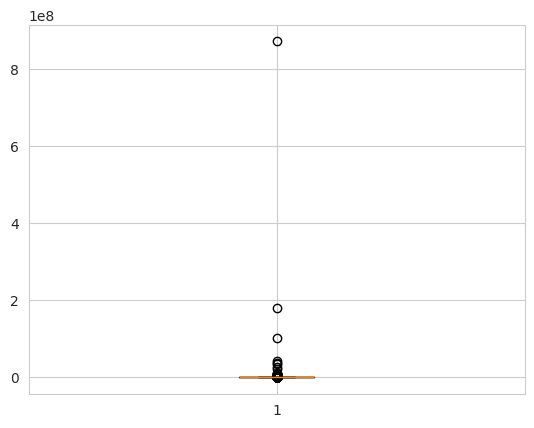

In [ ]:
import matplotlib.pyplot as plt
data2 = data1.copy()
data2.addtl_compensation.fillna(0, inplace=True)

plt.boxplot(data2.annual_salary)
plt.show()

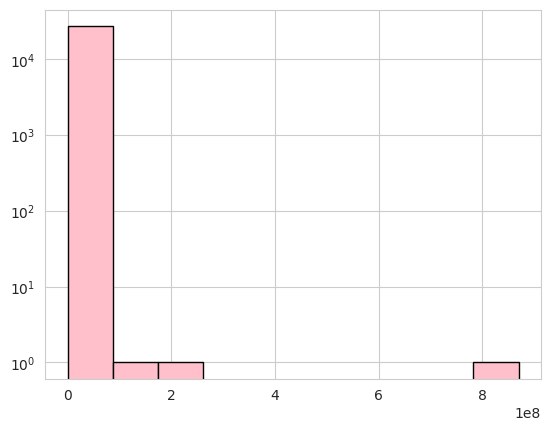

In [ ]:
plt.hist(data2.annual_salary, edgecolor='black', color='pink')
plt.yscale('log')

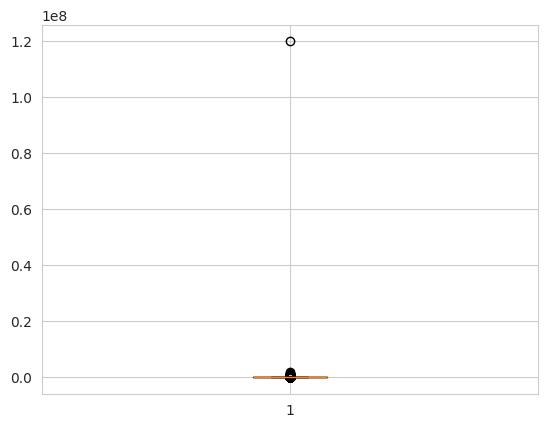

In [ ]:
plt.boxplot(data2.addtl_compensation)
plt.show()

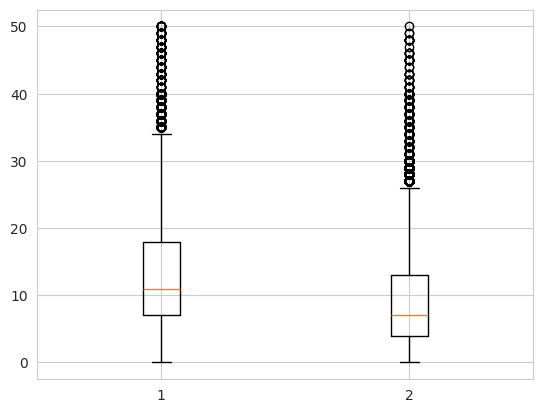

In [ ]:
plt.boxplot([data2.yrs_exp, data2.yrs_exp_field])
plt.show()

### Remove outlier using interquartile range (IQR) method

By recalculating the IQR and removing values outside a certain range, outliers can be effectively eliminated. The analysis is then visualized using a box plot.

In [ ]:
data2

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,0.0,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


In [ ]:
def remove_outlier_data(data, column):

  Q1c=data[column].quantile(0.25)
  Q3c=data[column].quantile(0.75)

  print('1stQ: ',Q1c, ' 2nsQ: ',Q3c)

  IQRc = Q3c-Q1c
  l = Q1c-1.5*IQRc
  h = Q3c+1.5*IQRc

  print(data.shape, l, h)
  data1 = data[(data[column] >l)&(data[column] < h)]

  return data1

In [ ]:
data3 = remove_outlier_data(data2, 'annual_salary')
data3 = remove_outlier_data(data3, 'addtl_compensation')
data3 = remove_outlier_data(data3, 'yrs_exp')
data3 = remove_outlier_data(data3, 'yrs_exp_field')
data3 = remove_outlier_data(data3, 'age')


1stQ:  54000.0  2nsQ:  109261.5
(27434, 14) -28892.25 192153.75
1stQ:  0.0  2nsQ:  5000.0
(26270, 14) -7500.0 12500.0
1stQ:  6.0  2nsQ:  18.0
(22964, 14) -12.0 36.0
1stQ:  4.0  2nsQ:  12.0
(22525, 14) -8.0 24.0
1stQ:  29.0  2nsQ:  40.0
(21556, 14) 12.5 56.5


In [ ]:
data3

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,0.0,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


## Feature Selection

Feature selection is about choosing the most relevant attributes from the dataset.

For now, we try to select only these features as predictors of the model.

### Check number of unique entries per column

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21285 entries, 0 to 28041
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 21285 non-null  int64  
 1   industry            21285 non-null  object 
 2   job                 21285 non-null  object 
 3   annual_salary       21285 non-null  float64
 4   addtl_compensation  21285 non-null  float64
 5   currency            21285 non-null  object 
 6   work_country        21285 non-null  object 
 7   US_state            17343 non-null  object 
 8   city                21285 non-null  object 
 9   yrs_exp             21285 non-null  int64  
 10  yrs_exp_field       21285 non-null  int64  
 11  educ_level          21285 non-null  object 
 12  gender              21285 non-null  object 
 13  race                21285 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 2.4+ MB


In [ ]:
for cat in data3.columns:

  print(cat, data3[cat].nunique())

age 42
industry 1007
job 11447
annual_salary 2905
addtl_compensation 398
currency 9
work_country 312
US_state 112
city 4073
yrs_exp 36
yrs_exp_field 24
educ_level 6
gender 5
race 46


### For this exercise, we try to reduce the number of variables for easier modelling

In [ ]:
list_top_industry = data3['industry'].value_counts()[:10].keys().to_list()
list_top_race = data3['race'].value_counts()[:5].keys().to_list()

data4 = data3[data3['industry'].isin(list_top_industry)]
data4 = data4[data4['race'].isin(list_top_race)]

In [ ]:
data3['industry'].value_counts()

,count
industry,
Computing or Tech,2840
Nonprofits,2200
Education (Higher Education),2115
Government and Public Administration,1658
Health care,1481
...,...
Real Estate Investment Support,1
Government relations,1
Household Services,1


In [ ]:
for cat in data4.columns:

  print(cat, data4[cat].nunique())

age 42
industry 10
job 7902
annual_salary 2234
addtl_compensation 297
currency 8
work_country 249
US_state 84
city 3035
yrs_exp 36
yrs_exp_field 24
educ_level 6
gender 4
race 5


In [ ]:
data4.columns

Index(['age', 'industry', 'job', 'annual_salary', 'addtl_compensation',
       'currency', 'work_country', 'US_state', 'city', 'yrs_exp',
       'yrs_exp_field', 'educ_level', 'gender', 'race'],
      dtype='object')

### For this exercise, adjust the target variable


Separate entries with above $ 60k annual salary.

In [ ]:
data4['annual_salary_bin'] = data4['annual_salary'].apply(lambda x: 1 if x > 60000 else 0)

<ipython-input-108-806b3998a9e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['annual_salary_bin'] = data4['annual_salary'].apply(lambda x: 1 if x > 60000 else 0)


## Convert Categorical Features to Numerical Format

Ask: Why do we convert categorical features to numerical format?

### Create dummies

We'll need to convert categorical features to dummy variables using pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

<font color='blue'> Exercise 4 </font>

1. Convert categorical variables (`industry`, `work_country`, `educ_level`, `race`, `gender`) to dummy variables using
`pd.get_dummies(data, drop_first=True)`


2. Explore what the "drop_first" argument does and why do we need this?



In [ ]:
dummy_industry = pd.get_dummies(data4['industry'],drop_first=True, prefix='is')
dummy_educ_level = pd.get_dummies(data4['educ_level'],drop_first=True, prefix='is')
dummy_race = pd.get_dummies(data4['race'],drop_first=True, prefix='is')
dummy_gender = pd.get_dummies(data4['gender'],drop_first=True, prefix='is')

In [ ]:
pd.get_dummies(data4['gender'], prefix='is')

,is_Man,is_Non-binary,is_Other or prefer not to answer,is_Woman
0,False,False,False,True
1,False,True,False,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
28028,False,False,False,True
28033,True,False,False,False
28037,False,False,False,True
28039,False,False,False,True


In [ ]:
data5 = data4[['age', 'industry' , 'annual_salary_bin', 'yrs_exp' , 'yrs_exp_field' , 'educ_level', 'gender', 'race' ]]

In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14372 entries, 0 to 28041
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                14372 non-null  int64 
 1   industry           14372 non-null  object
 2   annual_salary_bin  14372 non-null  int64 
 3   yrs_exp            14372 non-null  int64 
 4   yrs_exp_field      14372 non-null  int64 
 5   educ_level         14372 non-null  object
 6   gender             14372 non-null  object
 7   race               14372 non-null  object
dtypes: int64(4), object(4)
memory usage: 1010.5+ KB


### Drop un-dummied columns

Since we already created the dummy variables, we can drop the old ones

In [ ]:
data5.drop(['industry', 'educ_level', 'race', 'gender'], axis=1,inplace=True)

<ipython-input-113-7d29f50c0d07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5.drop(['industry', 'educ_level', 'race', 'gender'], axis=1,inplace=True)


## Final checks

### Check for correlation

In [ ]:
data5.corr()

,age,annual_salary_bin,yrs_exp,yrs_exp_field
age,1.000000,0.144093,0.665492,0.506364
annual_salary_bin,0.144093,1.000000,0.157154,0.223777
yrs_exp,0.665492,0.157154,1.000000,0.621117
yrs_exp_field,0.506364,0.223777,0.621117,1.000000


### Show final data for modeling

In [ ]:
data6 = pd.concat([
    data5,
  dummy_industry,
  dummy_educ_level,
  dummy_race,
  dummy_gender,
                   ], axis=1)

In [ ]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14372 entries, 0 to 28041
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   age                                      14372 non-null  int64
 1   annual_salary_bin                        14372 non-null  int64
 2   yrs_exp                                  14372 non-null  int64
 3   yrs_exp_field                            14372 non-null  int64
 4   is_Computing or Tech                     14372 non-null  bool 
 5   is_Education (Higher Education)          14372 non-null  bool 
 6   is_Education (Primary/Secondary)         14372 non-null  bool 
 7   is_Engineering or Manufacturing          14372 non-null  bool 
 8   is_Government and Public Administration  14372 non-null  bool 
 9   is_Health care                           14372 non-null  bool 
 10  is_Law                                   14372 non-null  bool 
 11  is_Mark

## Perform Exploratory Data Analysis (EDA)

EDA is an essential part of any data analysis project. It involves **visualizing and understanding the dataset's characteristics**, **exploring relationships between variables**, and **identifying patterns or trends**. EDA provides valuable insights that guide **feature engineering and model selection**.

Ask: Why do think we need to EDA before we model?

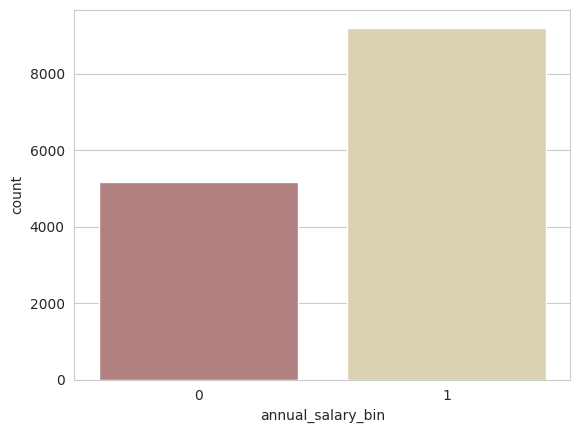

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=data6, x='annual_salary_bin', hue='annual_salary_bin', palette='pink', legend=False);

Ask: what do you notice in the plot above?

# Model Selection and Training

With the preprocessed dataset and engineered features, we proceed to classification using machine learning models. These are the following steps we must perform:

1. Split the data into training and testing sets
2. Train various models (e.g., logistic regression, decision trees, random forests)
3. Evaluate their performance using metrics like accuracy, precision, recall, and F1-score.

## Split Data into training sets and test sets

<font color='blue'> Exercise 5 </font>

1. Generate train and test sets with salary (>60k) as target variable and set test size to 0.30.

`X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target, test_size=0.30,
                                                    random_state=101)`

In [ ]:
  from sklearn.model_selection import train_test_split

In [ ]:
features = data6.drop('annual_salary_bin',axis=1)
target = data6['annual_salary_bin']

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.30,
                                                    stratify=target,
                                                    random_state=101)

print(f"Total # of sample in whole dataset: {len(features)}")
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 14372
**************************************************
Total # of sample in train dataset: 10060
Shape of X_train: (10060, 24)
**************************************************
Total # of sample in test dataset: 4312
Shape of X_test: (4312, 24)


In [ ]:
# sc=StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
data6.head()

,age,annual_salary_bin,yrs_exp,yrs_exp_field,is_Computing or Tech,is_Education (Higher Education),is_Education (Primary/Secondary),is_Engineering or Manufacturing,is_Government and Public Administration,is_Health care,...,is_PhD,"is_Professional degree (MD, JD, etc.)",is_Some college,is_Asian or Asian American,is_Black or African American,"is_Hispanic, Latino, or Spanish origin",is_White,is_Non-binary,is_Other or prefer not to answer,is_Woman
0,30,0,7,6,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,31,0,10,5,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
2,34,0,2,4,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,26,1,10,6,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,26,0,9,6,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


## Model Training and Prediction

### Logistic Regression

In statistics, the logistic model is a **binary classifier used to model the probability of a certain class or event existing** such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

In this exercise, we determine if a person is part of salary bin 1 or 0 based on the features we selected in the previous steps.

<font color='blue'> Exercise 5 </font>

1. Create `logmodel` variable

`logmodel = LogisticRegression()`

2. Fit training set to model

`logmodel.fit(X_train,y_train)`

3. Show predictions and probability of predictions using the test set

> `predictions = logmodel.predict(X_test)`
> `predictions_proba = logmodel.predict_proba(X_test)`

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions

array([1, 1, 0, ..., 1, 1, 1])

# Model Evaluation and Performance Metrics

This step involves a detailed evaluation of the selected models. We assess their performance on the test data and compare them using various evaluation metrics. Additionally, we may perform hyperparameter tuning to optimize the models.

### Accuracy

> A measure of how often the classifier predicts correctly.

### Recall

> It is a measure of how much the classifier correctly predicts the true positive value. Also known as Sensitivity, Accuracy or Recall. (Sensitivity, Hit Rate or Recall) It should be as high as possible.

### Precision

> It shows how many of the values we guess as Positive are actually Positive.

### F1-Score

> F1 Score value shows the harmonic mean of Precision and Recall values.

** The reason why it is a harmonic average instead of a simple average is that we should not ignore extreme cases. If there was a simple average calculation, the F1 Score of a model with a Precision value of 1 and a Recall value of 0 would come as 0.5, and this would mislead us.


### What other evaluation metrics for classification exist?


<font color='blue'> Exercise 6 </font>

1. Display model performance using the classification report module
2. Generate confusion matrix

## Evaluate Model performance

In [ ]:
train_score = logmodel.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = logmodel.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 72.11729622266402
Test score of trained model: 71.68367346938776


We check precision, recall, f1-score using classification report.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54      1548
           1       0.74      0.86      0.79      2764

    accuracy                           0.72      4312
   macro avg       0.69      0.66      0.67      4312
weighted avg       0.71      0.72      0.70      4312



### Generate Confusion Matrix

<Axes: >

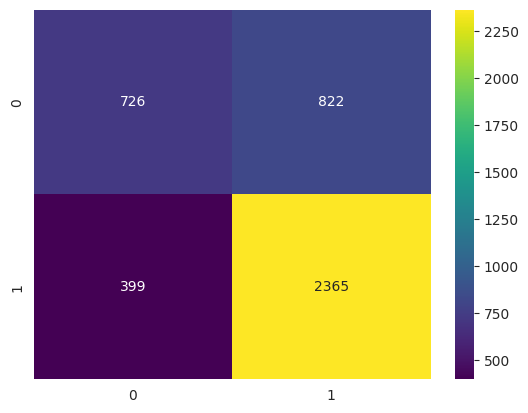

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')

## Imbalanced datasets

Imbalanced dataset is a problem because it can lead to biased models and inaccurate predictions. Here’s why:

* Skewed Class Distribution: Imbalanced dataset occurs when one class (the minority class) is significantly underrepresented compared to another class (the majority class) in a classification problem. This can skew the model’s learning process because it may prioritize the majority class, leading to poor performance on the minority class.
* Biased Model Training: Machine learning models aim to minimize errors, often measured by metrics like accuracy. In imbalanced datasets, a model can achieve high accuracy by simply predicting the majority class for all instances, ignoring the minority class completely. As a result, the model is biased towards the majority class and fails to capture patterns in the minority class accurately.
* Poor Generalization: Imbalanced data can result in models that generalize poorly to new, unseen data, especially for the minority class. Since the model hasn’t learned enough about the minority class due to its scarcity in the training data, it may struggle to make accurate predictions for instances belonging to that class in real-world scenarios.
* Costly Errors: In many real-world applications, misclassifying instances from the minority class can be more costly or have higher consequences than misclassifying instances from the majority class. Imbalanced data exacerbates this issue because the model tends to make more errors on the minority class, potentially leading to significant negative impacts.
* Evaluation Metrics Misleading: Traditional evaluation metrics like accuracy can be misleading in imbalanced datasets. For instance, a model achieving high accuracy may perform poorly on the minority class, which is often the class of interest. Using metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) can provide a more nuanced understanding of the model’s performance across different classes.

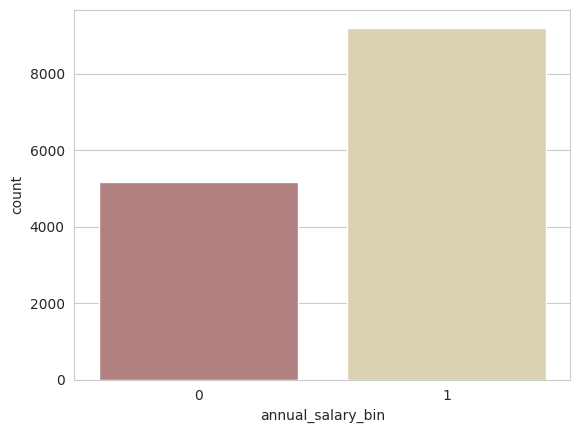

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=data6, x='annual_salary_bin', hue='annual_salary_bin', palette='pink', legend=False);

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
data6_majority = data6[(data6['annual_salary_bin']==1)]
data6_minority = data6[(data6['annual_salary_bin']==0)]
# upsample minority class
data6_minority_upsampled = resample(data6_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= len(data6_majority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data7 = pd.concat([data6_minority_upsampled, data6_majority])

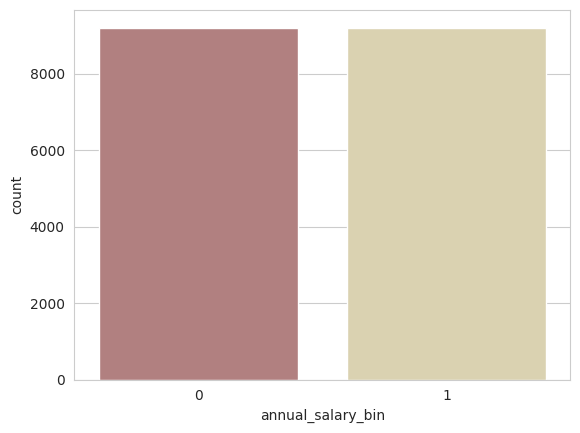

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=data7, x='annual_salary_bin', hue='annual_salary_bin', palette='pink', legend=False);

## Hyperparameter Tuning

Hyperparameter optimization is the process of finding the most suitable hyperparameter combination according to the success metric specified for a machine learning algorithm.

Given that there are dozens of hyperparameters for a machine learning algorithm and dozens of values these hyperparameters can take, it's clear how difficult it will be to try all combinations one by one and pick the best combination. For this reason, different methods have been developed for hyperparameter optimization. GridSearchCV and RandomizedSearchCV are among these methods.

### GridSearchCV
For the hyperparameters and their values that are desired to be tested in the model, a separate model is established with all combinations and the most successful hyperparameter set is determined according to the specified metric.

In [ ]:
features = data7.drop('annual_salary_bin',axis=1)
target = data7['annual_salary_bin']

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.30,
                                                    stratify=target,
                                                    random_state=101)

print(f"Total # of sample in whole dataset: {len(features)}")
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 18426
**************************************************
Total # of sample in train dataset: 12898
Shape of X_train: (12898, 24)
**************************************************
Total # of sample in test dataset: 5528
Shape of X_test: (5528, 24)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Set Up LogisticRegression Model
logmodel = LogisticRegression()

# Set Up Parameter Grid for Grid Search
param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l1', 'l2'],
    'solver': [ 'liblinear', 'saga']}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(logmodel, param_grid, cv=5, verbose = 2, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Fit the Model with Best Parameters and Evaluate
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f'GridSearchView Best Score: {grid_search.best_score_*100}')
print(f'GridSearchView Best Params: {grid_search.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchView Best Score: 69.11133454166179
GridSearchView Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
train_score_b = best_model.score(X_train, y_train)
print(f'Train score of trained model: {train_score_b*100}')

test_score_b = best_model.score(X_test, y_test)
print(f'Test score of trained model: {test_score_b*100}')

Train score of trained model: 69.11149015351216
Test score of trained model: 68.21635311143271


<Axes: >

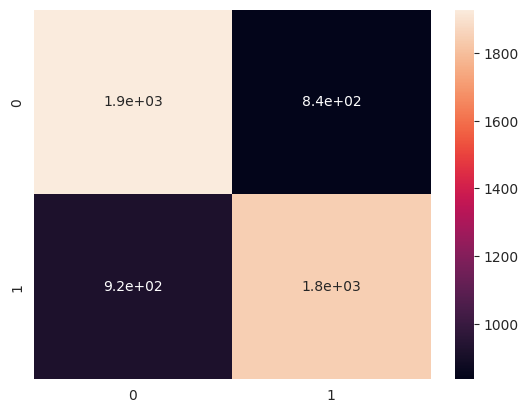

In [ ]:
grid_predictions = grid_search.predict(X_test)

cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      2764
           1       0.69      0.67      0.68      2764

    accuracy                           0.68      5528
   macro avg       0.68      0.68      0.68      5528
weighted avg       0.68      0.68      0.68      5528



# Feature Engineering

Based on the results above, what do you think we can do to make the results better?

Feature engineering focuses on creating new features or modifying existing ones to **improve the predictive power of the model**. In this exercise, we generate meaningful features from the dataset, which can include creating age groups, extracting titles from names, and encoding categorical variables.

Ask:

1. Why do we need feature engineering?
2. What variables can we feature engineer?

In [ ]:
data3

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
0,30,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Massachusetts,Boston,7,6,Master's degree,Woman,White
1,31,Computing or Tech,Change & Internal Communications Manager,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,10,5,College degree,Non-binary,White
2,34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,0.0,USD,US,Tennessee,Chattanooga,2,4,College degree,Woman,White
3,26,Nonprofits,Program Manager,62000.0,3000.0,USD,USA,Wisconsin,Milwaukee,10,6,College degree,Woman,White
4,26,"Accounting, Banking & Finance",Accounting Manager,60000.0,7000.0,USD,US,South Carolina,Greenville,9,6,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28037,46,Health care,Research Manager,77600.0,0.0,USD,United States,Utah,Salt Lake City,14,7,Master's degree,Woman,White
28038,41,Hospitality & Events,Director of Training,85000.0,0.0,USD,United States,Texas,Dallas,25,11,Some college,Woman,White
28039,29,Computing or Tech,Digital Content Developer,80000.0,6000.0,USD,USA,Minnesota,Minneapolis,8,7,College degree,Woman,Asian or Asian American
28040,29,Business or Consulting,business analyst,59000.0,0.0,USD,United States,Alabama,birmingham,14,1,College degree,Man,White


### Separate US states from non US states

data_fe = data3.copy()

In [ ]:
data_fe = data3.copy()

data_fe[(data_fe['US_state'].isna()) & (data_fe['work_country'] == 'United States')]

,age,industry,job,annual_salary,addtl_compensation,currency,work_country,US_state,city,yrs_exp,yrs_exp_field,educ_level,gender,race
10,34,Nonprofits,Office Manager,47500.0,0.0,USD,United States,NaN,"Boston, MA",7,6,College degree,Woman,White
21,36,Nonprofits,Program Coordinator & Assistant Editor,50000.0,0.0,USD,United States,NaN,Atlanta,7,4,PhD,Woman,White
71,41,Aerospace contracting,Project engineer,122000.0,3600.0,USD,United States,NaN,Colorado Springs,17,15,Master's degree,Woman,White
132,42,Computing or Tech,Product Manager,130000.0,0.0,USD,United States,NaN,Philadelphia,18,14,College degree,Man,White
149,39,Nonprofits,Online Sales Support Manager,86000.0,6000.0,USD,United States,NaN,New York,13,9,College degree,Woman,White
224,34,Politics,Deputy C-level,105000.0,0.0,USD,United States,NaN,"Washington, DC",8,8,College degree,Woman,White
457,37,Government and Public Administration,Instructional Systems Specialist,101360.0,0.0,USD,United States,NaN,Washington DC,8,5,Master's degree,Woman,White
467,26,Nonprofits,Adult Services Librarian,33280.0,3000.0,USD,United States,NaN,Pittsburgh,6,6,Master's degree,Woman,White
601,38,Education (Higher Education),Lecturer,25000.0,0.0,USD,United States,NaN,"Albany, NY",9,9,PhD,Woman,White
604,53,Nonprofits,VP of Communications,154000.0,0.0,USD,United States,NaN,"Walnut Creek, California",14,18,Master's degree,Woman,White


In [ ]:
data_fe['work_country_c'] = data_fe['US_state'].apply(lambda x: "United States" if x is not np.nan else np.nan)

In [ ]:
data_fe['work_country_c'] = data_fe['work_country_c'].fillna(data_fe['work_country'])

In [ ]:
data_fe['work_country_c'].value_counts()[:10]

,count
work_country_c,
United States,17391
Canada,1275
UK,479
United Kingdom,464
Australia,242
Germany,140
England,116
Ireland,78
New Zealand,77


### Scale Currency to USD

### Add `total_salary` column to incorporate additional income

Yehey, we created our ML model. Good job!

Remember that Machine Learning is an iterative process. Try and try until you get the best model.